In [97]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report


In [98]:
diabet = pd.read_csv("E:/Project_DS/Diabet/diabetes.csv")

In [99]:
diabet

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [100]:
diabet.shape

(768, 9)

In [101]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
diabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
diabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [105]:
for col in cols_with_zero:
    zeros = (diabet[col] == 0).sum()
    print(f"{col}: {zeros} null")

Glucose: 5 null
BloodPressure: 35 null
SkinThickness: 227 null
Insulin: 374 null
BMI: 11 null


In [106]:
print("Баланс класів:")
print(diabet['Outcome'].value_counts())

Баланс класів:
Outcome
0    500
1    268
Name: count, dtype: int64


In [107]:
X = diabet.drop(columns=['Outcome'])
y = diabet['Outcome']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train share:", X_train.shape)
print("Test share:", X_test.shape)

Train share: (614, 8)
Test share: (154, 8)


In [109]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [111]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [112]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, pos_label=1))
y_pred_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143
F1-score: 0.56
ROC-AUC: 0.8229629629629629

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



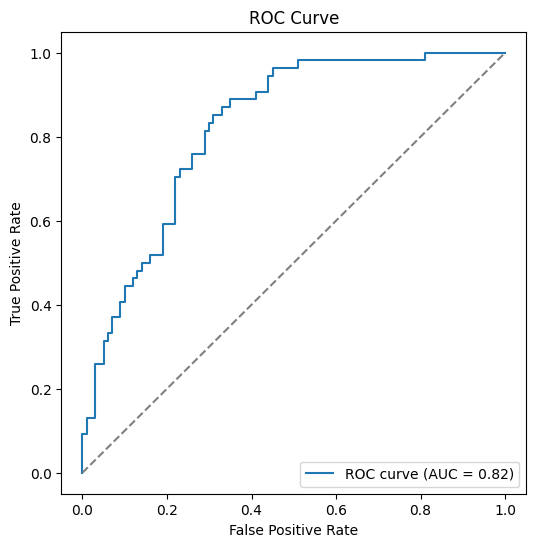

In [113]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

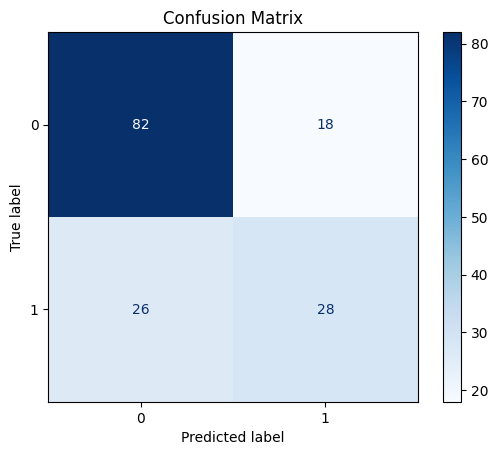

In [114]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [115]:
feature_names = diabet.drop('Outcome', axis=1).columns

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names, 
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)
}).sort_values(by='Absolute_Coefficient', ascending=False)

print(feature_importance)

                    Feature  Coefficient  Absolute_Coefficient
1                   Glucose     1.144151              1.144151
5                       BMI     0.713893              0.713893
0               Pregnancies     0.373178              0.373178
6  DiabetesPedigreeFunction     0.255527              0.255527
2             BloodPressure    -0.197637              0.197637
7                       Age     0.184179              0.184179
4                   Insulin    -0.127308              0.127308
3             SkinThickness     0.066535              0.066535


In [116]:
feature_importance.head(5)

,Feature,Coefficient,Absolute_Coefficient
1,Glucose,1.144151,1.144151
5,BMI,0.713893,0.713893
0,Pregnancies,0.373178,0.373178
6,DiabetesPedigreeFunction,0.255527,0.255527
2,BloodPressure,-0.197637,0.197637


C:\Users\K.K.S\AppData\Local\Temp\ipykernel_17296\294957805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


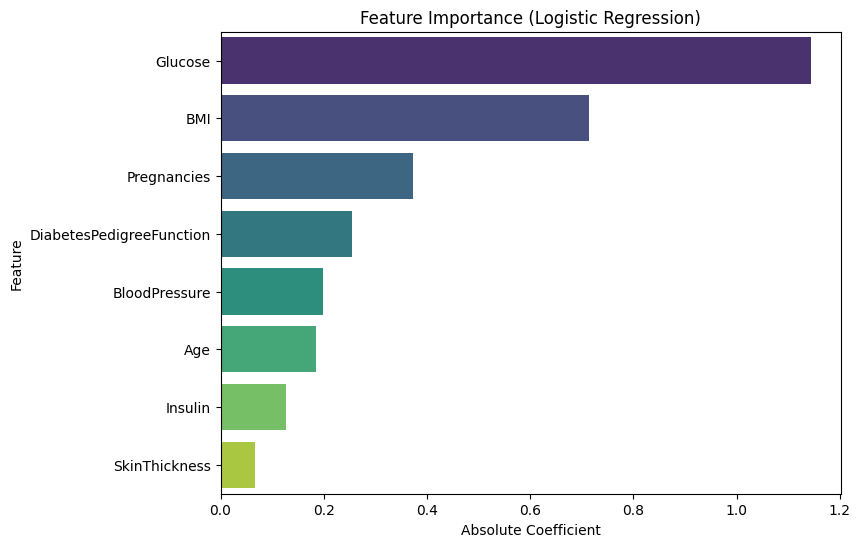

In [117]:
plt.figure(figsize=(8,6))
sns.barplot(
    x='Absolute_Coefficient', 
    y='Feature', 
    data=feature_importance,
    palette='viridis'
)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

In [118]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

feature_importances = {}

In [119]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    print(f"{name} - Accuracy: {acc:.3f}, ROC-AUC: {roc:.3f}")


Logistic Regression - Accuracy: 0.714, ROC-AUC: 0.823
Random Forest - Accuracy: 0.760, ROC-AUC: 0.815
XGBoost - Accuracy: 0.734, ROC-AUC: 0.805


c:\Users\K.K.S\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:24:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [129]:
all_importances = []

for name, model in models.items():
    if name == 'Logistic Regression':
        coefficients = model.coef_[0]
        importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': np.abs(coefficients),
            'Model': name
        })
    else:
        importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': model.feature_importances_,
            'Model': name
        })
    top5 = importance.sort_values(by='Importance', ascending=False).head(5)
    all_importances.append(top5)


In [130]:
all_importances_df = pd.concat(all_importances)

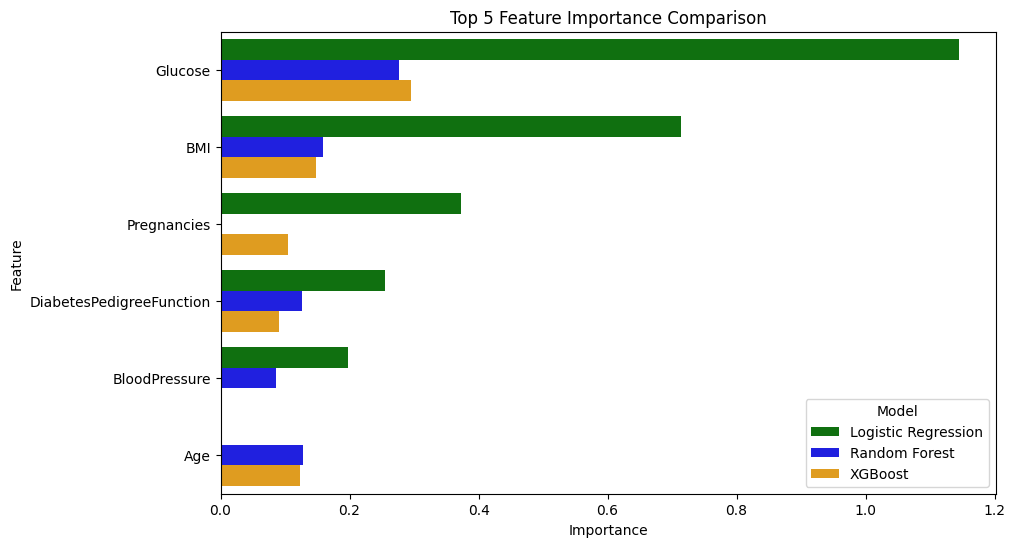

In [131]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    hue='Model', 
    data=all_importances_df, 
    palette={'Logistic Regression':'green','Random Forest':'blue','XGBoost':'orange'}
)
plt.title('Top 5 Feature Importance Comparison')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.show()